In [2]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.random.seed(12345)
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
plt.rcParams["font.family"] = 'Malgun Gothic'

## # 7장 데이터 정제 및 준비(Data Cleaning and Preparation)
* 7.1 누락된 데이터 처리하기
  * np.nan
  * None
  * isna() : 결측치에 대해 True 값으로 반환
  * dropna() : 결측치 제거하기
  * fillna() :결측값을 다른 값으로 채우는 데 사용


In [3]:
# ex : 다음 주어진 결측치을 담고 있는 데이터프레임에 대해 정제 작업하기
df = pd.DataFrame(np.random.standard_normal((7, 3)))
# print(df)
# 결측치 추가
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
print(df)

#1. 결측치 확인 및 처리
df.isna()

filtered = df.dropna() # 적어도 한 개 이상 결측치를 갖고 있는 행을 삭제
filtered

#2. 색인 재설정
filtered.reset_index(drop=True)

#3. 결측치를 평균값으로 채우기 - 평균값, 중앙값(df.median())
df.fillna(df.mean())

          0         1         2
0 -0.204708       NaN       NaN
1 -0.555730       NaN       NaN
2  0.092908       NaN  0.769023
3  1.246435       NaN -1.296221
4  0.274992  0.228913  1.352917
5  0.886429 -2.001637 -0.371843
6  1.669025 -0.438570 -0.539741


,0,1,2
0,-0.204708,-0.737098,-0.017173
1,-0.555730,-0.737098,-0.017173
2,0.092908,-0.737098,0.769023
3,1.246435,-0.737098,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


7.2 Transformation
* duplicated()
  * 데이터프레임의 중복된 행 또는 값은 True로 표시되고, 중복되지 않은 행 또는 값은 False로 표시    
* drop_duplicates()
  * DataFrame 또는 Series의 모든 열을 고려하여 중복된 행 또는 값을 제거
    * subset: 중복된 행 또는 값을 제거하는 데 사용할 열의 리스트
    * keep: 다음 값 중 하나.
      * first: 첫 번째 중복된 행 또는 값을 유지.
      * last: 마지막 중복된 행 또는 값을 유지
      * False: 모든 중복된 행 또는 값을 제거.
      * inplace: DataFrame을 변경할지 여부를 표시.

In [4]:
# ex 데이터프레임의 중복 데이터 제거하기 
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 5, 5]})


print(data)

#1. 중복된 데이터 확인
data.duplicated()

#2. 중복된 행 제거하기
data.drop_duplicates(keep="last")

#3. "K1" 열을 기준으로 중복된 행을 필터링하기
data.drop_duplicates(subset=['k1'], keep="last")

    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   5
6  two   5


,k1,k2
4,one,3
6,two,5


## 문제: 주어진 데이터셋를 정제하고 준비하여 다음 분석을 수행하시오.
* 데이터셋:


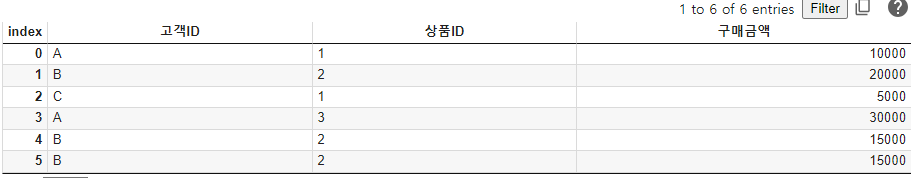
  * 고객별 구매 금액 합계
  * 상품별 구매 금액 합계
  * 고객별로 가장 많이 구매한 상품

In [5]:
# 데이터셋

data = [
  {"customer_id": "A", "product_id": "1", "amount": 10000},
  {"customer_id": "B", "product_id": "2", "amount": 20000},
  {"customer_id": "C", "product_id": "1", "amount": 5000},
  {"customer_id": "A", "product_id": "3", "amount": 30000},
  {"customer_id": "B", "product_id": "2", "amount": 15000},
  {"customer_id": "B", "product_id": "2", "amount": 15000}
]



In [6]:
# 데이터프레임 탐색
# 1) 데이터셋을 데이터프레임으로 변환하기
df = pd.DataFrame(data)

# 2) 데이터프레임을 첫 행부터 5번째 행까지 슬라이싱하기
df.head()

# 3)데이터프레임의 열 이름을 변경하기
df.rename(columns = {"customer_id": "고객ID", "product_id": "상품ID", "amount": "구매금액"} , inplace= True)
df

,고객ID,상품ID,구매금액
0,A,1,10000
1,B,2,20000
2,C,1,5000
3,A,3,30000
4,B,2,15000
5,B,2,15000


In [7]:
# 데이터프레임 정제하기
# 1). 결측치 데이터 확인하기
df.isna()


# 2). 중복 데이터 확인하기
df.duplicated()

# 3). 중복 데이터 제거
df.drop_duplicates()

,고객ID,상품ID,구매금액
0,A,1,10000
1,B,2,20000
2,C,1,5000
3,A,3,30000
4,B,2,15000


In [8]:
# 데이터프레임 정렬하기
# 1) 고객ID 와 상품ID을 기준으로 내림차순으로 정렬하기
df = df.sort_values(by=['고객ID','상품ID'], ascending=True)
df

# 2) 데이터프레임의 기존의 인덱스을 색인 재설정하기
df = df.reset_index(drop=True)
df

,고객ID,상품ID,구매금액
0,A,1,10000
1,A,3,30000
2,B,2,20000
3,B,2,15000
4,B,2,15000
5,C,1,5000


In [12]:
# 4. 데이터분석하기
# 1) 고객별 구매 금액 합계를 계산 (hint: groupby())

total_spent_by_customer = df.groupby("고객ID")["구매금액"].sum()
print(total_spent_by_customer)



# 2) 상위 최우수 고객 2명 추출하기
result = total_spent_by_customer.sort_values(ascending=False)
result.head(1)

고객ID
A    40000
B    50000
C     5000
Name: 구매금액, dtype: int64


고객ID
B    50000
Name: 구매금액, dtype: int64

In [13]:
# 3) 상품별 구매 금액 합계를 계산
total_spent_by_product = df.groupby("상품ID")["구매금액"].sum()
print(total_spent_by_product)

상품ID
1    15000
2    50000
3    30000
Name: 구매금액, dtype: int64


In [23]:
# 4) 고객에서 가장 인기있는 상품 찾기
#(1)
product_counts = df["상품ID"].value_counts()
print(product_counts)
product_counts.idxmax() # 중요! 가장 많은 count값의 상품 ID 반환

#(2)
product_counts = df["상품ID"].value_counts()
product_counts[product_counts == product_counts.max()].idxmax()


상품ID
2    3
1    2
3    1
Name: count, dtype: int64


'2'

고객ID
A    20000.000000
B    16666.666667
C     5000.000000
Name: 구매금액, dtype: float64


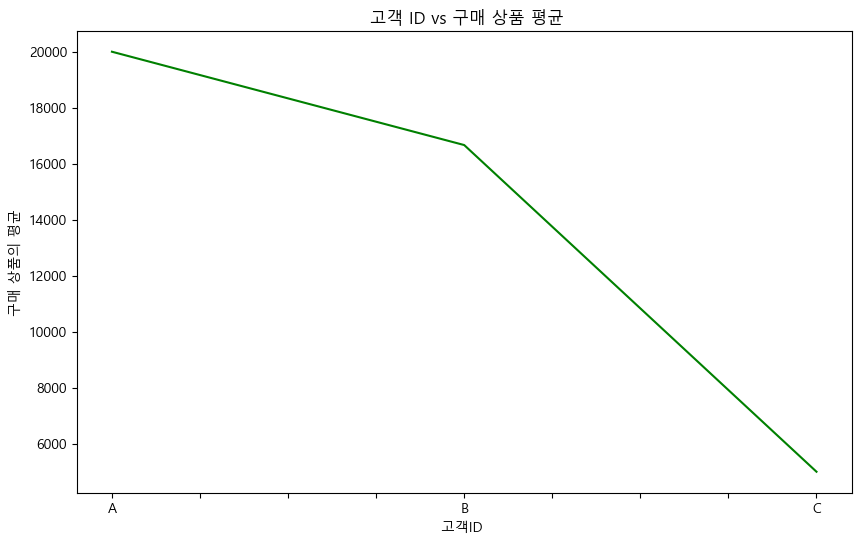

In [29]:
# 5) 고객ID별 구매금액의 평균를 계산하고 시각화
grouped_mean = df.groupby("고객ID")["구매금액"].mean()
print(grouped_mean)
#2)
#grouped_mean.plot.bar(color = "green")
grouped_mean.plot(kind="line",color="green")
plt.xlabel("고객ID ")
plt.ylabel("구매 상품의 평균")
plt.title(" 고객 ID vs 구매 상품 평균")
plt.show()

고객ID  상품ID
A     1       10000
      3       30000
B     2       50000
C     1        5000
Name: 구매금액, dtype: int64


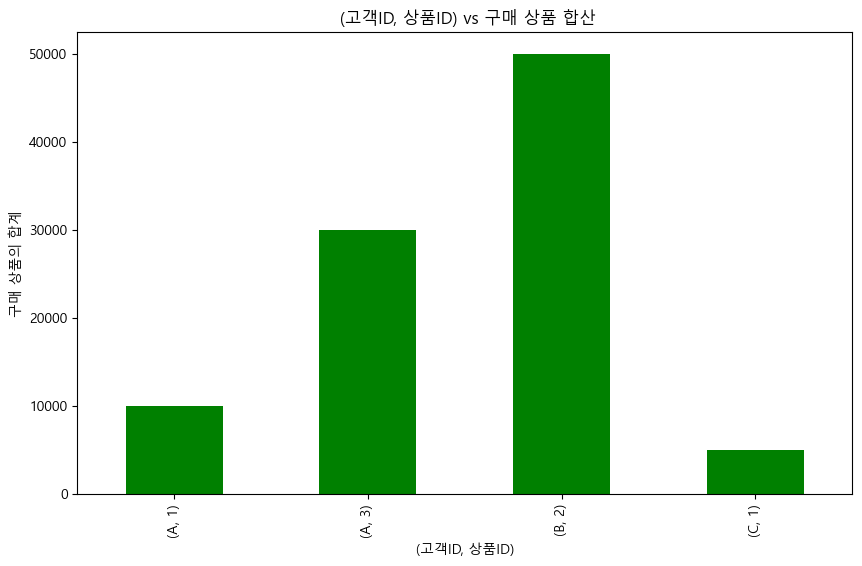

In [33]:
# 6) 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 합계를 계산하고 시각화
grouped_df = df.groupby(['고객ID',"상품ID"])["구매금액"].sum()
print(grouped_df)
grouped_df.index

grouped_df.plot(kind = "bar", color = "green") #!!!

plt.xlabel(" (고객ID, 상품ID) ")
plt.ylabel("구매 상품의 합계")
plt.title(" (고객ID, 상품ID) vs 구매 상품 합산")
plt.show()

# 8장 다중색인(mutiIndex)
* 다중색인(multi-index)은 데이터프레임이나 시리즈의 인덱스를 여러 열로 구성하는 것
* 다중색인 사용
  * 데이터를 여러 기준으로 그룹화
  * 데이터를 여러 기준으로 검색


In [34]:
# ex
# 1. 다중색인 생성

# 1) 데이터프레임 생성
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
print(df)
print(df.index)

# 2) 다중 색인으로 사용할 튜플 리스트
index = [('X', 1), ('X', 2), ('Y', 1)]

# 3) 다중색인 설정
df.index = pd.MultiIndex.from_tuples(index)

# 4) 색인 확인
print(df.index)
print(df)

#2.다중색인 사용
#1) 데이터프레임을 인덱스의 첫 번째 레벨로 그룹화하기
grouped = df.groupby(level = 0)

# 2)각 그룹의 평균을 구하기
grouped.mean()

   A  B
0  1  4
1  2  5
2  3  6
RangeIndex(start=0, stop=3, step=1)
MultiIndex([('X', 1),
            ('X', 2),
            ('Y', 1)],
           )
     A  B
X 1  1  4
  2  2  5
Y 1  3  6


,A,B
X,1.5,4.5
Y,3.0,6.0


In [37]:
# ex
# 1. 다중 색인 생성(2)
df = pd.DataFrame({
    "data": [1, 2, 3, 4],
    "index1": ["A", "A", "B", "B"],
    "index2": [1, 2, 1, 2],
})
print(df)
print()

df = df.set_index(["index1", "index2"])
print(df)
print()

# 2.다중 색인 사용
grouped = df.groupby(level=0).mean()
grouped

   data index1  index2
0     1      A       1
1     2      A       2
2     3      B       1
3     4      B       2

               data
index1 index2      
A      1          1
       2          2
B      1          3
       2          4



,data
index1,
A,1.5
B,3.5


In [41]:
# 데이터셋 슬라이싱 :
print(df)
print()
df.loc["A", 1] # 레벨 1에서 "A" 선택, 레벨 2에서 1 선택

df.loc["B", :] # 레벨 1에서 "B" 선택, 레벨 2에서 모든 값 선택

df.loc[[('A', 2),('B',2)]] # 레벨 1에서 "A"와 "B" 선택, 레벨 2에서 1 선택

               data
index1 index2      
A      1          1
       2          2
B      1          3
       2          4



,,data
index1,index2,
A,2,2
B,2,4


### [문제]: 다음 DataFrame에서 고객ID와 상품ID를 기준으로 다중색인을 만들고, 각 그룹의 구매금액의 합계를 계산하세요.

In [42]:
# 데이터셋
data = [
  {"고객ID": "A", "상품ID": "1", "구매금액": 10000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 20000},
  {"고객ID": "C", "상품ID": "1", "구매금액": 5000},
  {"고객ID": "A", "상품ID": "3", "구매금액": 30000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 15000},
  {"고객ID": "B", "상품ID": "2", "구매금액": 15000}
]

# 1. 데이터프레임 생성
df = pd.DataFrame(data)
print(df)
print()
# 2. 고객ID와 상품ID을 기준으로 다중색인을 생성하여 주어진 데이터프레임을 그룹하기
df =df.set_index(['고객ID', '상품ID'])
print(df)
print()
#3. 데이터프레임의 다중색인을 출력하기
df.index

  고객ID 상품ID   구매금액
0    A    1  10000
1    B    2  20000
2    C    1   5000
3    A    3  30000
4    B    2  15000
5    B    2  15000

            구매금액
고객ID 상품ID       
A    1     10000
B    2     20000
C    1      5000
A    3     30000
B    2     15000
     2     15000



MultiIndex([('A', '1'),
            ('B', '2'),
            ('C', '1'),
            ('A', '3'),
            ('B', '2'),
            ('B', '2')],
           names=['고객ID', '상품ID'])

In [ ]:
# 4. 고객을 기준으로 묶어서 구매금액의 합을 계산하시오.


# 5. 상품을 기준으로 묶어서 구매금액의 합을 계산하시오.

# 6. 결과를 출력하시오.


# 9.2장. plotting with pandas and seaborn


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import  numpy as np

* Bar Plots (막대그래프)
  * 범주형 데이터의 빈도, 비율을 시각화하는데 효과적
  * 빈도 분포 표시
  * 비율, 백분율 표시
  * 시계열 데이터 표시
  * 다중 변수의 비교


              A         B         C         D
one    0.037145  0.034132  0.230497  0.228354
two    0.624911  0.892561  0.779728  0.721451
three  0.310442  0.363083  0.196082  0.935492
four   0.561734  0.817292  0.348914  0.799714
five   0.104104  0.712120  0.917448  0.803585
six    0.327113  0.255107  0.495002  0.413611


<Axes: >

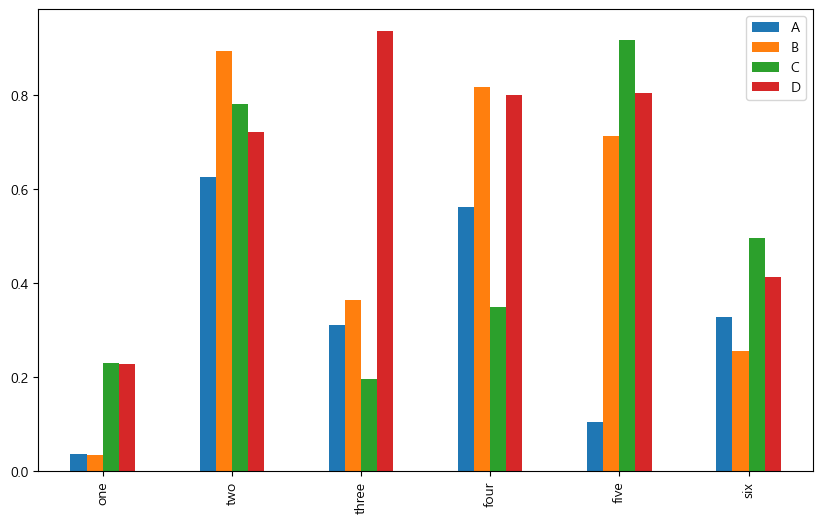

In [43]:
# ex
#1. DataSet
df = pd.DataFrame(np.random.uniform(size=(6,4)),
                  index = ["one", "two", "three", "four", "five", "six"],
                  columns = ["A","B", "C", "D"])
print(df)

df.plot.bar()

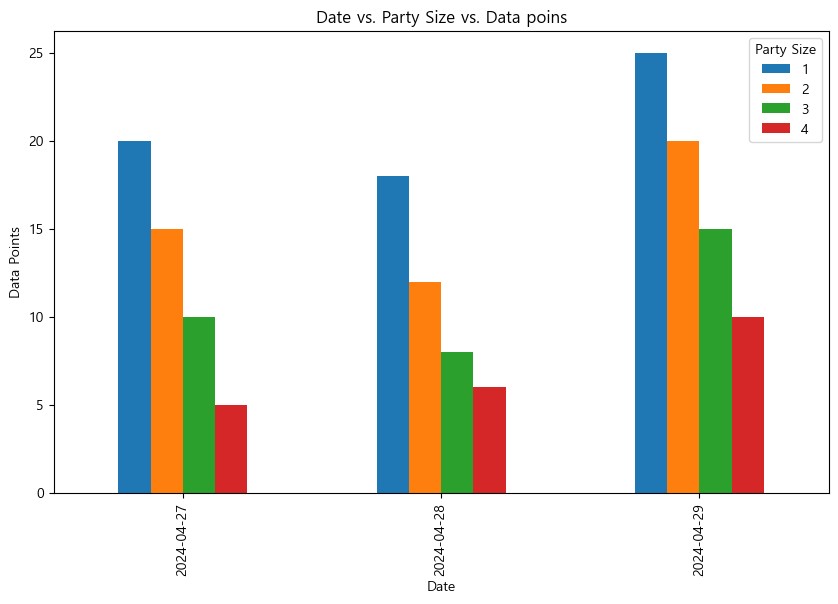

In [50]:
# ex
# 1. Dataset
# 가상의 데이터 (날짜, 파티 규모, 데이터 포인트 수)
data = {
    'Date': ['2024-04-27', '2024-04-27', '2024-04-27', '2024-04-27',
             '2024-04-28', '2024-04-28', '2024-04-28', '2024-04-28',
             '2024-04-29', '2024-04-29', '2024-04-29', '2024-04-29'],
    'Party Size': ['1', '2', '3', '4', '1', '2', '3', '4', '1', '2', '3', '4'],
    'Data Points': [20, 15, 10, 5, 18, 12, 8, 6, 25, 20, 15, 10]
}

# 2. DataFrame 생성
df = pd.DataFrame(data)
# 3. 데이터프레임을 피벗하여 각 파티 규모별 데이터를 준비
pivot_df = df.pivot(index='Date', columns='Party Size', values='Data Points')
# 4.막대 그래프 그리기
pivot_df.plot.bar(stacked=False, figsize=(10, 6))
# 5. 그래프의 속성 추가
plt.xlabel("Date")
plt.ylabel('Data Points')
plt.title("Date vs. Party Size vs. Data poins")
plt.legend(title= 'Party Size')
plt.show()

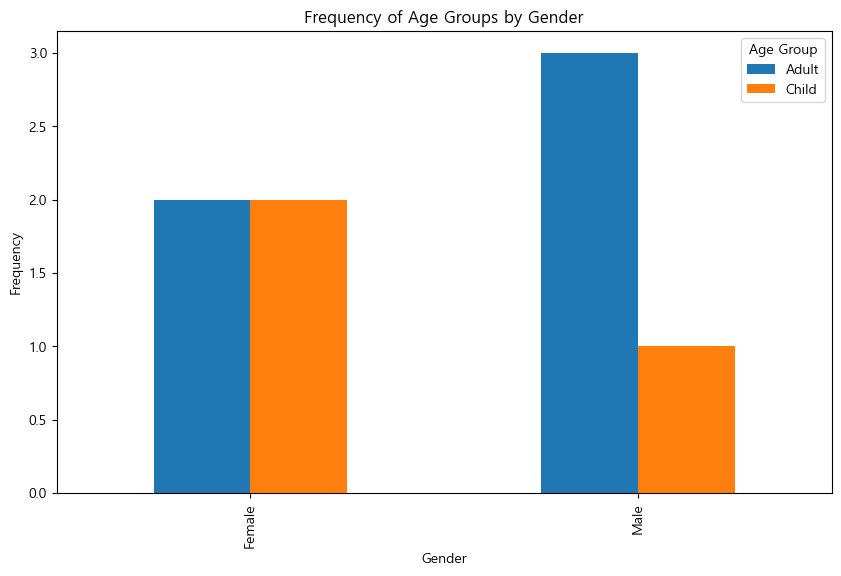

In [53]:
#ex : 범주형 데이터의 그래프 그리기
# 1.  가상의 데이터의 데이터프레임
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male'],
    'Age Group': ['Adult', 'Adult', 'Child', 'Adult', 'Child', 'Child', 'Adult', 'Adult']
}

df = pd.DataFrame(data)
df.head()

#2. 교차표 생성
cross_tab = pd.crosstab(df['Gender'], df['Age Group'])
cross_tab 

#막대 그래프 그리기
cross_tab.plot.bar()
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of Age Groups by Gender')
plt.legend(title='Age Group')
plt.show()

## [예제]
* 'day'별에 따라 'size' 인원별 팁의 백분율을 보여주는 쌓인 막대 그래프를 그리기

size   2   3   4  5
day                
Thur  48   4   5  1
Fri   16   1   1  0
Sat   53  18  13  1
Sun   39  15  18  3

size         2         3         4         5
day                                         
Thur  0.827586  0.068966  0.086207  0.017241
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000


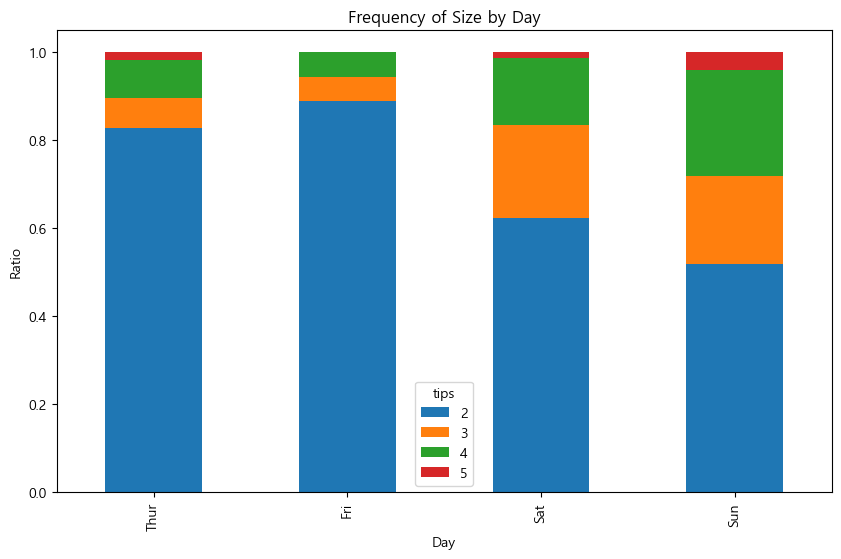

In [61]:
# 1. Dataset불러오기
tips = pd.read_csv('examples/tips.csv')

# 2. 빈도수 표 만들기
party_counts = pd.crosstab(tips["day"], tips['size'])
# print(party_counts)

#3. 인덱스 재설정
party_counts = party_counts.reindex(index = ["Thur","Fri","Sat","Sun"])
# print(party_counts)

## 3. 필터링
party_counts = party_counts.loc[:,2:5]
print(party_counts)
print()
# 4. 데이터 정규화 또는 비율로 계산
party_pcts = party_counts.div(party_counts.sum(axis = "columns"),
                              axis = "index")
print(party_pcts)

# # 5. 막대그래프로 그리기
party_pcts.plot.bar(stacked=True)
plt.xlabel('Day')
plt.ylabel('Ratio')
plt.title('Frequency of Size by Day')
plt.legend(title='tips')
plt.show()

<Axes: xlabel='tip_pct', ylabel='day'>

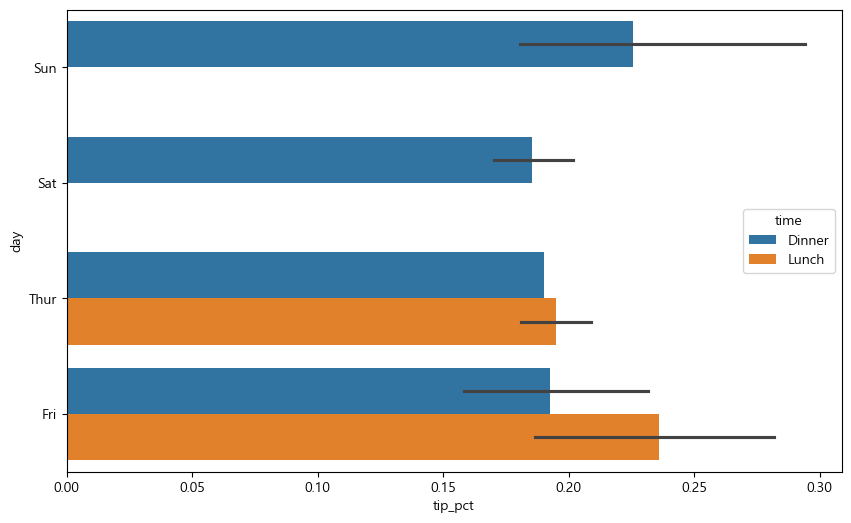

In [64]:
import seaborn as sns
tips["tip_pct"] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

sns.barplot(x = "tip_pct", y='day', data=tips, orient='h', hue='time')

# # 빅데이터 분석에 필요한 pandas의 데이터프레임의 핵심 기능
  * 데이터프레임 생성: pd.DataFrame() 함수를 사용하여 데이터프레임을 생성
  * 데이터프레임 인덱싱: loc 및 iloc 인덱서를 사용하여 데이터프레임의 특정 행과 열을 선택
  * 데이터프레임 슬라이싱: 슬라이싱 연산자를 사용하여 데이터프레임의 부분을 선택
  * 데이터프레임 필터링: 불리언 마스크를 사용하여 데이터프레임의 행과 열을 필터링
  * 데이터프레임 정렬: sort_values() 메서드를 사용하여 데이터프레임을 열 또는 인덱스별로 정렬
  * 데이터프레임 집계: groupby() 메서드를 사용하여 데이터프레임을 그룹화하고 집계 연산을 수행
  * 데이터프레임 결측치 처리: fillna() 메서드를 사용하여 데이터프레임의 결측치를 채우기
  * 데이터프레임 결합: merge() 메서드나 concat() 메서드를 사용하여 여러 데이터프레임을 결합하기

## [문제] 다음 주어진 데이터셋에서 다음 작업을 수행하시오.
  * 나이가 30세 이상인 사람들의 이름을 출력하기
  * 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기
  * 이름이 'Bob'인 사람의 도시를 출력하기

In [ ]:
# dataset
data = {
    'Name': ['John', 'Mary', 'Bob', 'Alice', 'Tom'],
    'Age': [20, 25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Dallas']
}

In [ ]:
# 1. 나이가 30세 이상인 사람들의 이름 출력하기



In [ ]:
# 2. 도시가 'New York' 또는 'Los Angeles'인 사람들의 나이의 평균을 출력하기



In [ ]:
# 3. 이름이 'Bob'인 사람의 도시를 출력하기



# 10장 데이터 집계와 그룹 연산
* 하나 이상의 키(함수, 배열, 데이터프레임의 열 이름)를 이용해서 판다스 객체를 여러 조각으로 나누는 방법
* 합계, 평균, 표준편차, 사용자 정의 함수 같은 그룹 요약 통계를 계산하는 방법
* 정규화, 선형 회귀, 순위 또는 부분집합 선택 같은 그룹 내 변형이나 다른 조작을 적용하는 방법




* groupby() 연산에 대한 원리- apply()
    * 분리-적용-결합(split-apply-combine)
    * Aggregations refer to any data transformation that produces scalar values from arrays. 

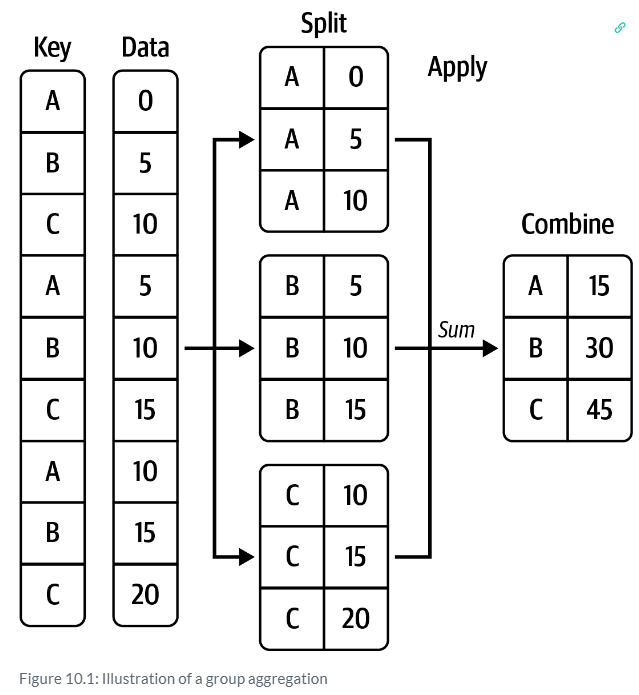

### [예제] 주어진 데이터를 key1으로 묶고 각 그룹에서 data1의 평균을 구하기

In [65]:
# 데이터셋
dataset = {"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1],
                                      dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)}
df = pd.DataFrame(dataset)
df

,key1,key2,data1,data2
0,a,1,-0.289436,-0.135722
1,a,2,-0.751921,1.430042
2,None,1,-0.132609,-0.846852
3,b,2,1.457300,0.603282
4,b,1,0.609512,1.263572
5,a,<NA>,-0.493779,-0.255491
6,None,1,1.239980,-0.445688


In [71]:
# mean() - 주어진 데이터을 컬럼을 사용하여 각 그룹으로 묶어 평균 집계 
# groupby().mean()
## 그룹 색인에서 누락된 값은 기본적으로 결과에서 제외됨

df.groupby("key1").mean()

df.groupby("key2").mean(numeric_only=True) # key1열이 결과에서 빠짐: df['key1']은 숫자 데이터가 아님

df.groupby(["key1", "key2"]).mean()

df.groupby(["key1", "key2"])[["data1"]].mean()

data1
key1 key2          
a    1    -0.289436
     2    -0.751921
b    1     0.609512
     2     1.457300

## 예제: 10.2.1 열에 여러 가지 함수 적용하기
* Column-Wise and Multiple Function Application


In [79]:
# 데이터셋 가져오기
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [80]:
# total_bill에서 팁의 비율을 tip_pct 열에 출가하기
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


* agg()
  * 데이터프레임의 모든 열을 집계하려면 mean이나 std 같은 메서드를 호출하거나 agg를 통해 원하는 함수를 사용
  * 열에 따라 다른 함수를 사용해서 집계를 수행하거나 여러 개의 함수를 한 번에 적용하기

In [81]:
# ex1
grouped = tips.groupby(["day", "smoker"])
grouped_pct = grouped["tip_pct"]
grouped_pct.agg("mean") # 기술 통계에서는 함수 이름을 문자열로 넘기기

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [82]:
tips.groupby(["day", "smoker"])["tip_pct"].agg("mean")

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [83]:
# ex2
grouped_pct.agg(["mean", "std"])  #함수 이름을 열 이름으로 하는 데이터프레임을 얻는다.

mean       std
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [84]:
# ex3 데이터프레임은 열마다 다른 함수를 적용하거나 여러 개의 함수를 모든 열에 적용하기
functions = ["mean", "max"]
result = grouped[["tip_pct", "total_bill"]].agg(functions)  # 데이터프레임은 계층적인 열로 구성
result

tip_pct           total_bill       
                 mean       max       mean    max
day  smoker                                      
Fri  No      0.151650  0.187735  18.420000  22.75
     Yes     0.174783  0.263480  16.813333  40.17
Sat  No      0.158048  0.291990  19.661778  48.33
     Yes     0.147906  0.325733  21.276667  50.81
Sun  No      0.160113  0.252672  20.506667  48.17
     Yes     0.187250  0.710345  24.120000  45.35
Thur No      0.160298  0.266312  17.113111  41.19
     Yes     0.163863  0.241255  19.190588  43.11

In [85]:
# 각 열을 따로 계산한 다음 concat 메서드를 이용해 keys 인수로 열 이름을 넘긴 후 이어 붙인 것과 동일
result_conc = pd.concat([result['tip_pct'], result['total_bill']], axis='columns')
result_conc

mean       max       mean    max
day  smoker                                      
Fri  No      0.151650  0.187735  18.420000  22.75
     Yes     0.174783  0.263480  16.813333  40.17
Sat  No      0.158048  0.291990  19.661778  48.33
     Yes     0.147906  0.325733  21.276667  50.81
Sun  No      0.160113  0.252672  20.506667  48.17
     Yes     0.187250  0.710345  24.120000  45.35
Thur No      0.160298  0.266312  17.113111  41.19
     Yes     0.163863  0.241255  19.190588  43.11

## # 10.2.2 색인되지 않은 형태로 집계된 데이터 반환하기
* 집계된 데이터는 유일한 그룹 키 조합으로 (어떤 경우에는 계층적 색인)되어 반환되었다.
* groupby메서드에 as_index=False를 넘겨서 색인 작업을 비활성화

In [88]:
# grouped = tips.groupby(["day", "smoker"], as_index=False)
# grouped.mean(numeric_only=True)

tips.groupby(["day", "smoker"], as_index=True).mean(numeric_only=True)

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

## # 10.3 apply 메서드 : 일반적인 분리-적용-병합
* apply() 메서드는 groupby 메서드의 가장 일반적인 메서드
* apply 메서드는 객체를 여러 조각으로 나누고, 전달된 함수를 각 조각에 일괄적으로 적용한 후 이를 다시 합친다.

In [89]:
# 특정 열에서 가장 큰 값을 갖는 행을 선택하는 함수 정의
def top(df, n=5, column="tip_pct"):
    return df.sort_values(column, ascending=False)[:n]
    
top(tips, n=3,column="tip_pct")

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733


In [90]:
tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")

C:\Users\user\AppData\Local\Temp\ipykernel_5464\643835440.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")


total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [91]:
result = tips.groupby("smoker")["tip_pct"].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [92]:
result.unstack("smoker")


       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

## [문제] 
* 고객ID와 상품ID를 기준으로 그룹화하여 구매금액의 평균을 계산하고, 그 결과를 상품ID순으로 출력하세요.

고객ID  상품ID
1     101     10000.0
3     101     40000.0
2     102     20000.0
3     102     60000.0
1     103     30000.0
2     103     50000.0
Name: 구매금액, dtype: float64


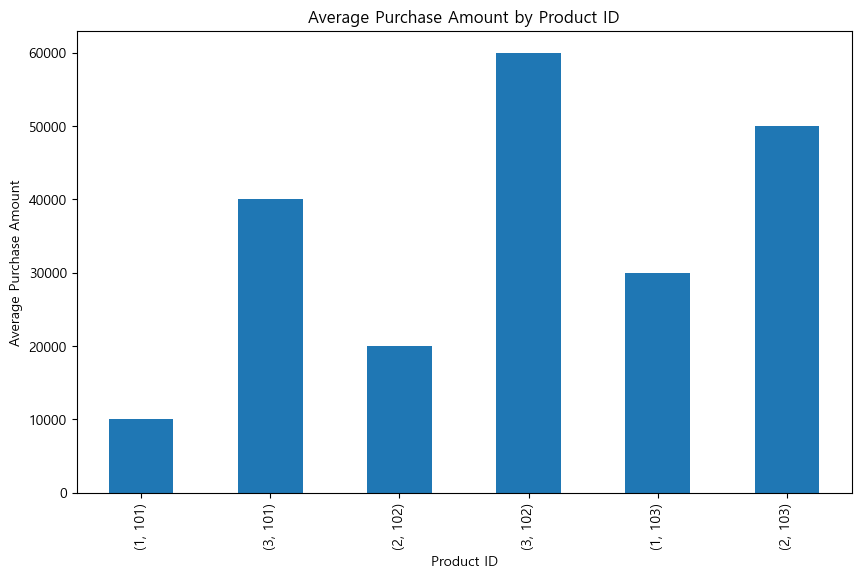

In [93]:
df = pd.DataFrame({
    "고객ID": [1, 2, 1, 3, 2, 3],
    "상품ID": [101, 102, 103, 101, 103, 102],
    "구매금액": [10000, 20000, 30000, 40000, 50000, 60000]
})

# 고객ID와 상품ID을 기준으로 그룹화하여 구매금액의 평균을 계산
average_spent_by_customer_product = df.groupby(["고객ID", "상품ID"])["구매금액"].mean()

# 상품ID을 기준으로 정렬하기
average_spent_by_customer_product = average_spent_by_customer_product.sort_index(level = "상품ID")
print(average_spent_by_customer_product)

# 막대그래프로 시각화하기
average_spent_by_customer_product.plot.bar()


# 그래프 부가 정보 추가하기
plt.title("Average Purchase Amount by Product ID")
plt.xlabel("Product ID")
plt.ylabel("Average Purchase Amount")
plt.show()